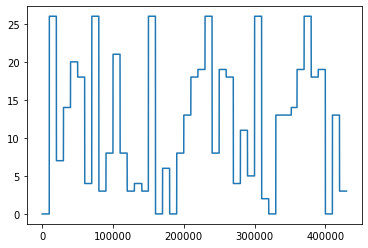

a house divided against itself cannot stannd


In [1]:
import string

import numpy as np
import matplotlib.pyplot as plt
b = np.loadtxt('emissionMatrix.txt')
pi = np.loadtxt('initialStateDistribution.txt')
obs = np.loadtxt('observations.txt').astype(int)
a = np.loadtxt('transitionMatrix.txt')
log_a = np.log(a)
T = len(obs)
n = len(pi)
l = np.zeros((n, T))
phi = np.zeros((T, n))
for j in range(l.shape[1]):
    for i in range(l.shape[0]):
        if j == 0:
            l[i][j] = np.log(pi[i]) + np.log(b[i][obs[0]])
        if j > 0:
            l_it = l[:, j-1]
            a_ij = log_a[:, i]
            first = np.max(l_it + a_ij)
            phi[j][i] = np.argmax(l_it + a_ij)
            l[i][j] = first + np.log(b[i][obs[j]])
s = np.zeros(len(obs))
s[-1] = int(np.argmax(l[:, -1].flatten()))
for t in range(len(obs) - 2, -1, -1):
    s[t] = phi[t+1][int(s[t+1])]
x = range(0, len(obs))
plt.plot(x, s)
plt.show()

alphabet = list('abcdefghijklmnopqrstuvwxyz ')
result = []
for i in range(len(s)):
    if i == 0:
        result.append(alphabet[int(s[0])])
        continue
    if s[i] == s[i - 1]:
        if alphabet[int(s[i - 1])] == 'n' and alphabet[int(s[i - 2])] == 'a':
            result.append(alphabet[int(s[i])])
        else:
            continue
    else:
        result.append(alphabet[int(s[i])])
result = ''.join(result)
print(result)